<a href="https://colab.research.google.com/github/snugpenguin968/UTD-Internship/blob/main/Explainable%20AI/CustomerChurn/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Analysis

In [30]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") 
    os.environ["PYTHONWARNINGS"] = "ignore" 

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
pd.options.display.float_format = "{:,.2f}".format

In [31]:
df = pd.read_csv("churn.csv")

In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


## Visualizations

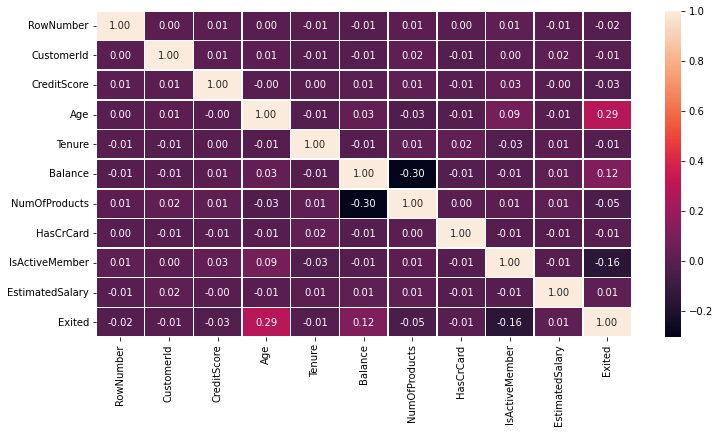

In [35]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


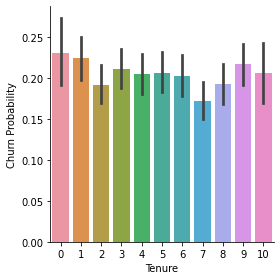

In [36]:
g= sns.factorplot(x = "Tenure", y = "Exited", data = df, kind = "bar", size = 4)
g.set_ylabels("Churn Probability")
plt.show()

There is a lower chance of exit in the mid Tenure range

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


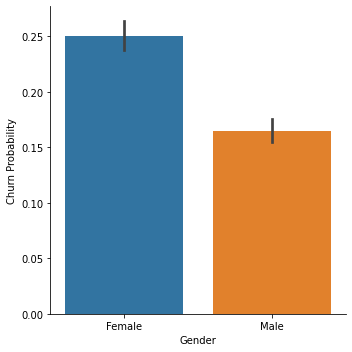

In [37]:
g= sns.factorplot(x = "Gender", y = "Exited", data = df, kind = "bar", size = 5)
g.set_ylabels("Churn Probability")
plt.show()

Females have a higher chance of exiting

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


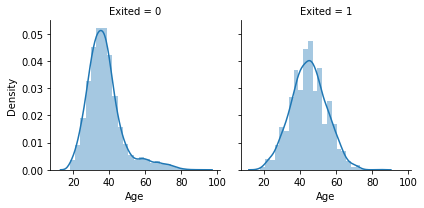

In [38]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


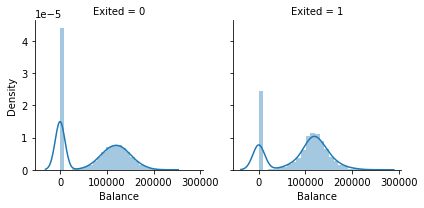

In [39]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


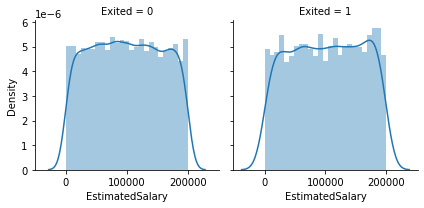

In [40]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


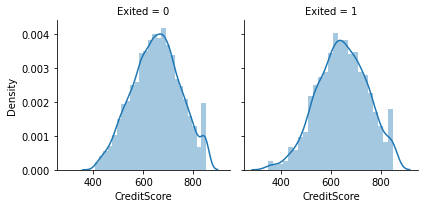

In [41]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

## Data Preprocessing

In [42]:
xs = df.drop(['RowNumber',"Exited"], axis=1)
target = df["Exited"]
x_train, x_val, y_train, y_val = train_test_split(xs, target, test_size = 0.20, random_state = 0)

val_ids = x_val['CustomerId']
train_ids=x_train['CustomerId']

x_train = x_train.drop(['CustomerId'], axis=1)
x_val= x_val.drop(['CustomerId'], axis=1)

df_train=df[df['CustomerId'].isin(train_ids)]
df_val=df[df['CustomerId'].isin(val_ids)]

In [43]:
x_train.shape

(8000, 11)

In [44]:
for df in [x_train,x_val]:
    df["Gender"]=df["Gender"].map(lambda x: 0 if x=='Female' else 1)
    df.drop(['Surname'], axis = 1, inplace=True)

In [45]:
x_train,x_val= [ pd.get_dummies(data, columns = ['Geography']) for data in [x_train,x_val]]

In [46]:
x_train.shape

(8000, 12)

In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7389 to 2732
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Gender             8000 non-null   int64  
 2   Age                8000 non-null   int64  
 3   Tenure             8000 non-null   int64  
 4   Balance            8000 non-null   float64
 5   NumOfProducts      8000 non-null   int64  
 6   HasCrCard          8000 non-null   int64  
 7   IsActiveMember     8000 non-null   int64  
 8   EstimatedSalary    8000 non-null   float64
 9   Geography_France   8000 non-null   uint8  
 10  Geography_Germany  8000 non-null   uint8  
 11  Geography_Spain    8000 non-null   uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 648.4 KB


## Modeling

In [48]:
r=1309
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),BaggingClassifier(random_state=r),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          XGBClassifier(random_state=r), MLPClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN","SVC","Bagging",
             "DecisionTree","Random_Forest","GBM","XGBoost","Art.Neural_Network"]

In [49]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_val))

Default model validation accuracies for the train data:

LogisticRegression : 0.789
GaussianNB : 0.784
KNN : 0.764
SVC : 0.797
Bagging : 0.851
DecisionTree : 0.805
Random_Forest : 0.868
GBM : 0.869
XGBoost : 0.867
Art.Neural_Network : 0.761


In [50]:
predictors=pd.concat([x_train,x_val])

In [51]:
results = []
print('10 fold Cross validation accuracy', end = "\n\n")
for name, model in zip(names, models):
    kfold = KFold(n_splits=10, random_state=1001,shuffle=True)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))

10 fold Cross validation accuracy

LogisticRegression: 0.796 (0.009)
GaussianNB: 0.796 (0.009)
KNN: 0.762 (0.010)
SVC: 0.796 (0.009)
Bagging: 0.783 (0.011)
DecisionTree: 0.670 (0.009)
Random_Forest: 0.795 (0.009)
GBM: 0.796 (0.010)
XGBoost: 0.796 (0.009)
Art.Neural_Network: 0.660 (0.186)


In [ ]:

logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
svc_params= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1, 5, 10 ,50 ,100],
                 "C": [1,10,50,100,200,300,1000]}
bag_params={"n_estimators":[50,120,300]}
dtree_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}
rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}

mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],"max_iter":[1000]}

classifier_params = [logreg_params,NB_params,knn_params,svc_params,bag_params,dtree_params,rf_params,
                     gbm_params, xgb_params,mlpc_params]  

In [ ]:
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
      clf = GridSearchCV(model, param_grid=classifier_param, cv =10, scoring = "accuracy", n_jobs = -1,verbose = False)
      clf.fit(x_train,y_train)
      cv_result[name]=clf.best_score_
      best_estimators[name]=clf.best_estimator_
      print(name,'cross validation accuracy : %.3f'%cv_result[name])

In [ ]:
accuracies={}
print('Validation accuracies', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_val)
    accuracy=accuracy_score(y_pred, y_val)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy

In [ ]:
n=3
accu=sorted(accuracies, reverse=True, key= lambda k:accuracies[k])[:n]
firstn=[[k,v] for k,v in best_estimators.items() if k in accu]

In [ ]:
votingC = VotingClassifier(estimators = firstn, voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_val),y_val))

A small improvement over FOLD-R++, but in the world of ML, such a difference can have a huge impact